# Skewed Text Geometric Transform

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

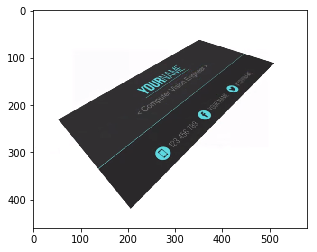

In [4]:
# read in image, copy and convert to RGB

image = cv2.imread('images/business_card_skewed.png')

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

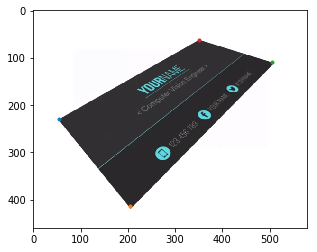

In [20]:
# found coordinates first by opening image with %matplotlib qt5 and placing cursor on corners
top_left = (54, 229)
bottom_left = (205, 413)
bottom_right = (506, 109)
top_right = (350, 62)

corners = [top_left, bottom_left, bottom_right, top_right]

# display image with points on corners
plt.imshow(image_copy)

for corner in corners:
    plt.plot(corner[0], corner[1], '.')

## Define the Geometric Transform

In [45]:
def warp(image, source_pts):
    """
    Args:
        image (cv2.image): image to transform
        source_pts (list of tuple/list): Corner coords in anti-clockwise order from top left
    """
    source_pts = np.float32(source_pts)
    
    # normal perspective rectangle (points in same order as source_pts)
    warped_pts = np.float32([[50,150],
                             [50,350],
                             [550,350],
                             [550,150]])
    
    # compute perspective transformation perspective matrix
    M = cv2.getPerspectiveTransform(source_pts, warped_pts)
    
    # can also compute inverse
    M_inv = cv2.getPerspectiveTransform(warped_pts, source_pts)
    
    # image size as (width, height) required by cv2.warpPerspective
    image_size = (image.shape[1], image.shape[0])
    
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
    return warped

## Compute and Plot Transformed Image

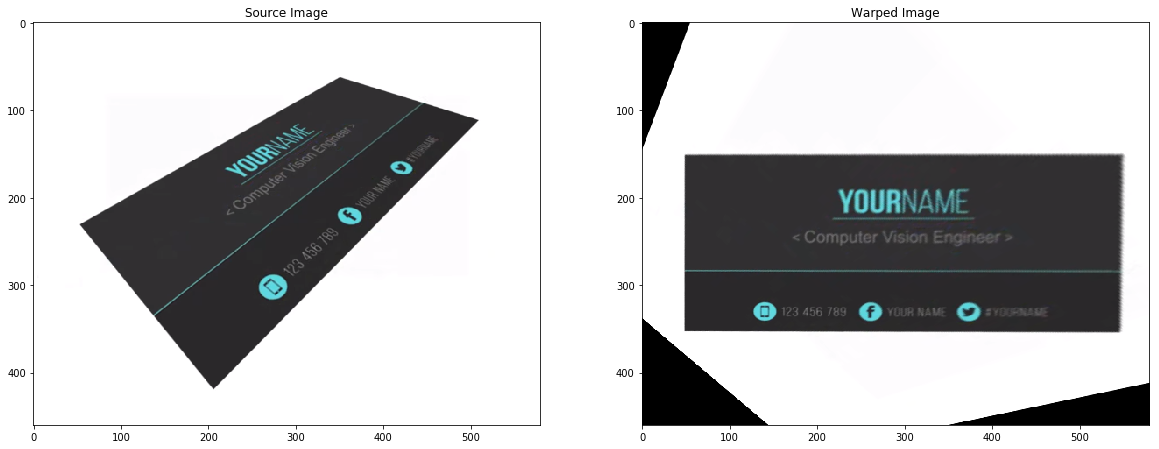

In [46]:
warped_image = warp(image_copy, corners)

# create side-by-side plots for comparison
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Source Image')
ax1.imshow(image_copy)
ax2.set_title('Warped Image')
ax2.imshow(warped_image)